

# Brown PVT SENSORS


## Installation Instructions:


1) Make an account with [Sandia National Laboratories] and download the serial version of Xyce

2) Add Xyce to your path variable
 
3) If you wish to run this script locally, make sure to have the following modules installed:

 - os
 - csv
 - numpy
 - matplotlib
 
*Alternatively, you can just run this script through jupyter notebook*
 
4) Open terminal, change directory into your target folder and run the following command


```console
$ gitclone https://github.com/scale-lab/PVTsensors/tree/master/Sensors/
```
[Sandia National Laboratories]: <https://xyce.sandia.gov/downloads/sign-in.html>

## Current Functionality:

As of right now the following features are available using our python script

 - Transient simulation for node voltages
 - Parametric sweep
 

### Example 1: Transient Simulation

In [8]:
from PVT import BrownPVT

**Create a PVT object and associate it with a netlist and model library**

If you like, you can also pass the Xyce directory. For example, adding xyce_dir=r'C:\Program Files\Xyce 6.10 OPENSOURCE\bin'.

In [9]:
a = BrownPVT('uW_TSensor.netlist','MODELS.lib',vsupply=1.8,iref=1e-6)

**Define transient simulation parameters**

In [10]:
params={'initial_time':0.1e-9,
        'final_time':1e-6,
        'start_time':0,
        'step_ceil':1e-9
        }

**Run a transient simulation**

"C:\Program Files\Xyce 6.10 OPENSOURCE\bin\xyce" uW_TSensor.netlist


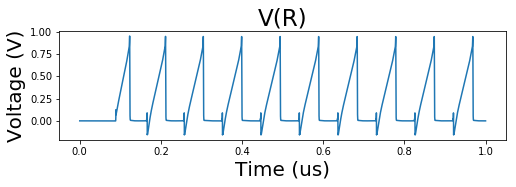

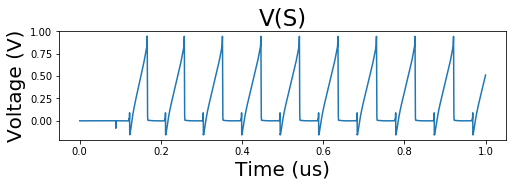

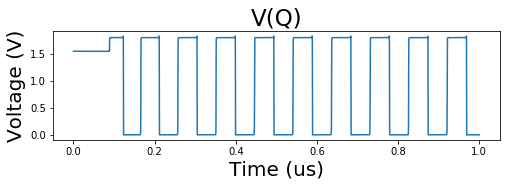

In [11]:
x = a.transient(printnodes=['V(R)','V(S)','V(Q)'],
                    params=params)

### Example 2: Parametric Sweep

In [12]:
from PVT import BrownPVT

**Define a parametric sweep**

Pass parameters for the transient analysis as before.

You can also pass parameters for expressions to measure, such as the frequency of v(q), below.

Finally, specify the parameters for the sweep. Here we sweep the temperature from 0C to 100C.

In [15]:
params={'initial_time':0.1e-9,
        'final_time':10e-6,
        'start_time':2e-6,
        'step_ceil':1e-9
        }

meas={'name':'Q_freq',
      'type':'FREQ',
      'signal':'v(q)',
      'other':'ON=0.9 OFF=0.9 PRECISION=12'
      }

sweep={'type':'LIN',
   'var':'TEMP',
   'initial':0,
   'final':100,
   'step':25,
   'result':'{1/Q_freq}',
   'plot':True
   }

**Run the parametric sweep**

"C:\Program Files\Xyce 6.10 OPENSOURCE\bin\xyce" uW_TSensor.netlist


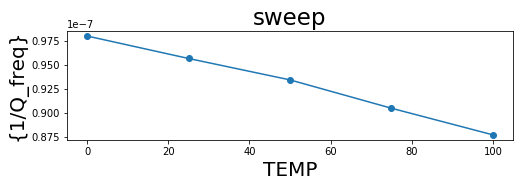

In [16]:
x = a.transient(printnodes=['Q_freq'],
                plotall=False,
                params=params,
                meas=meas,
                sweep=sweep)